### Exercises

#### Question 1

Alongside this notebook is a file `daily_quotes.csv` (the same one that we used for the Pandas exercises).

Using this data write a function that generates a composite of line charts (2 columns wide), that charts the closing price for each symbol in the data.

#### Solution

In [6]:
import pandas as pd

def load_data(file_name):
    # Read the CSV file and specify the data types
    df = pd.read_csv(file_name, parse_dates=['Date'], dtype={'Symbol': str, 'Low': float, 'Close/Last': float, 'Volume': int})
    
    df.set_index('Symbol', inplace=True)
    
    # Reorder the columns
    df = df[['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']]
    
    return df


In [7]:
file_name = 'daily_quotes.csv'
df = load_data(file_name)
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11788\483800711.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_name, parse_dates=['Date'], dtype={'Symbol': str, 'Low': float, 'Close/Last': float, 'Volume': int})


,Date,Close/Last,Volume,Open,High,Low
Symbol,,,,,,
AAPL,2021-02-12,135.37,60145130,134.350,135.53,133.6921
AMZN,2021-02-12,3277.71,2335339,3250.000,3280.25,3233.3100
GOOG,2021-02-12,2104.11,855865,2090.250,2108.82,2083.1300
MSFT,2021-02-12,244.99,16561080,243.933,245.30,242.7300
AAPL,2021-02-11,135.13,64280030,135.900,136.39,133.7700


In [10]:
df.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_closing_price_charts(df):
   
    
    # Group the data by symbol
    grouped_data = df.groupby('Symbol')
    
    # Determine the number of rows and columns for the subplots
    num_symbols = len(grouped_data)
    num_rows = (num_symbols + 1) // 2 
    num_cols = 2
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    # Plot the closing price for each symbol
    for i, (symbol, symbol_df) in enumerate(grouped_data):
        ax = axes[i]
        ax.plot(symbol_df['Date'].values, symbol_df[' Close/Last'].values)
        ax.set_title(symbol)
        ax.set_xlabel('Date')
        ax.set_ylabel('Closing Price')
    
    # Remove any unused subplots
    if num_symbols < num_rows * num_cols:
        for j in range(num_symbols, num_rows * num_cols):
            fig.delaxes(axes[j])
    
    # Adjust the layout and spacing
    fig.tight_layout()
    
    # Show the plot
    plt.show()


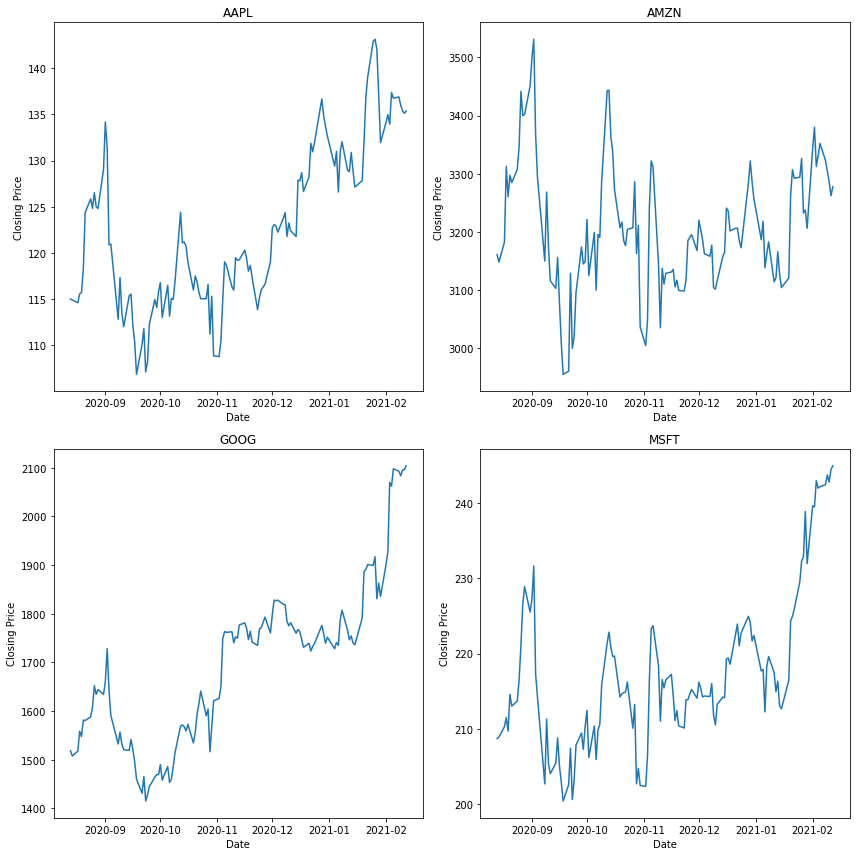

In [14]:
generate_closing_price_charts(df)

### Question 2

Expand on your previous function to include an `n`-day moving average on each chart. (When you calculate the moving average, be careful with the order of the data in each subset of data).

#### Solution

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_closing_price_charts(data_file, n):
    df = pd.read_csv(data_file)
    
    grouped_data = df.groupby('Symbol')
    
    # Determine the number of rows and columns for the subplots
    num_symbols = len(grouped_data)
    num_rows = (num_symbols + 1) // 2  # Add 1 to ensure at least 1 row
    num_cols = 2
    
    # Create the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
    
    axes = axes.flatten()
    
    # Plot the closing price and n-day moving average for each symbol
    for i, (symbol, symbol_df) in enumerate(grouped_data):
        ax = axes[i]
        
        # Calculate the n-day moving average
        symbol_df['Moving Average'] = symbol_df[' Close/Last'].rolling(n).mean()
        
        ax.plot(symbol_df['Date'].values, symbol_df[' Close/Last'].values, label='Closing Price')
        ax.plot(symbol_df['Date'].values, symbol_df['Moving Average'].values, label=f'{n}-day Moving Average')
        
        ax.set_title(symbol)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
    
    # Remove any unused subplots
    if num_symbols < num_rows * num_cols:
        for j in range(num_symbols, num_rows * num_cols):
            fig.delaxes(axes[j])
    
    # Adjust the layout and spacing
    fig.tight_layout()
    
    # Show the plot
    plt.show()


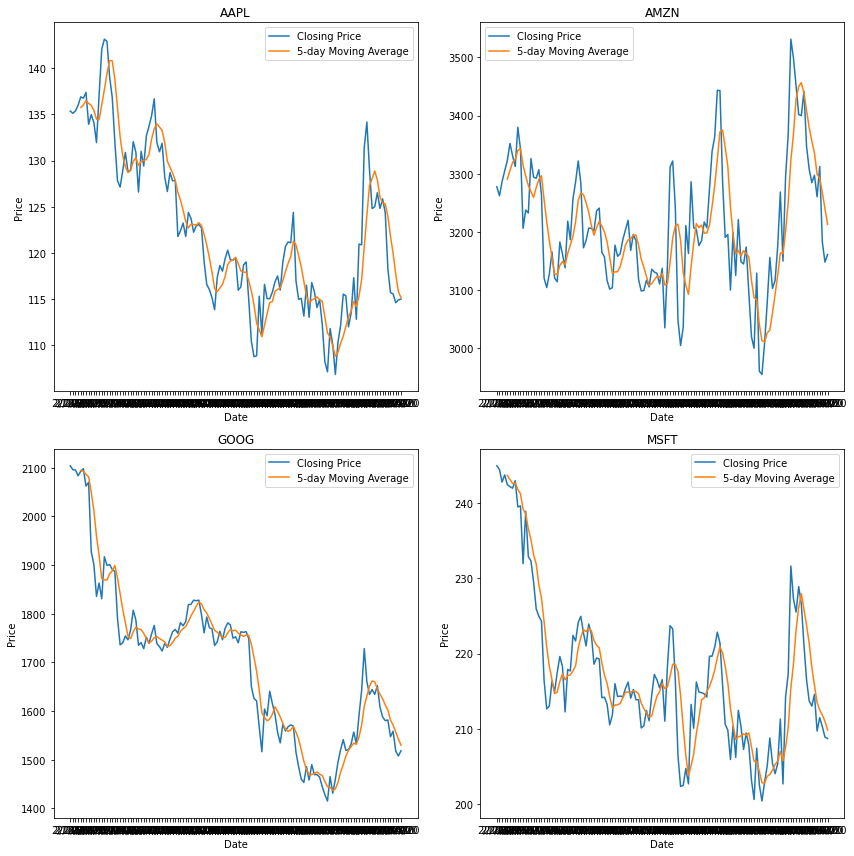

In [16]:
generate_closing_price_charts('daily_quotes.csv, 5)

#### Question 3

Using the previous charts, add horizontal lines for the 25th, 50th and 75th percentiles of the close price (calculated over the entire time period).

#### Solution

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_closing_price_charts(data_file, n):
    df = pd.read_csv(data_file)
    
    grouped_data = df.groupby('Symbol')
    
    # Determine the number of rows and columns for the subplots
    num_symbols = len(grouped_data)
    num_rows = (num_symbols + 1) // 2 
    num_cols = 2
    
    # Create the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
  
    axes = axes.flatten()
    

    percentile_25 = df[' Close/Last'].quantile(0.25)
    percentile_50 = df[' Close/Last'].quantile(0.50)
    percentile_75 = df[' Close/Last'].quantile(0.75)
    
    # Plot the closing price, moving average, and percentile lines for each symbol
    for i, (symbol, symbol_df) in enumerate(grouped_data):
        ax = axes[i]
        
        # Calculate the n-day moving average
        symbol_df['Moving Average'] = symbol_df[' Close/Last'].rolling(n).mean()
        
        ax.plot(symbol_df['Date'].values, symbol_df[' Close/Last'].values, label='Closing Price')
        ax.plot(symbol_df['Date'].values, symbol_df['Moving Average'].values, label=f'{n}-day Moving Average')
        
        # Plot horizontal lines for percentiles
        ax.axhline(percentile_25, color='r', linestyle='--', label='25th Percentile')
        ax.axhline(percentile_50, color='g', linestyle='--', label='50th Percentile')
        ax.axhline(percentile_75, color='b', linestyle='--', label='75th Percentile')
        
        ax.set_title(symbol)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
    
    # Remove any unused subplots
    if num_symbols < num_rows * num_cols:
        for j in range(num_symbols, num_rows * num_cols):
            fig.delaxes(axes[j])
    
    # Adjust the layout and spacing
    fig.tight_layout()
    
    # Show the plot
    plt.show()


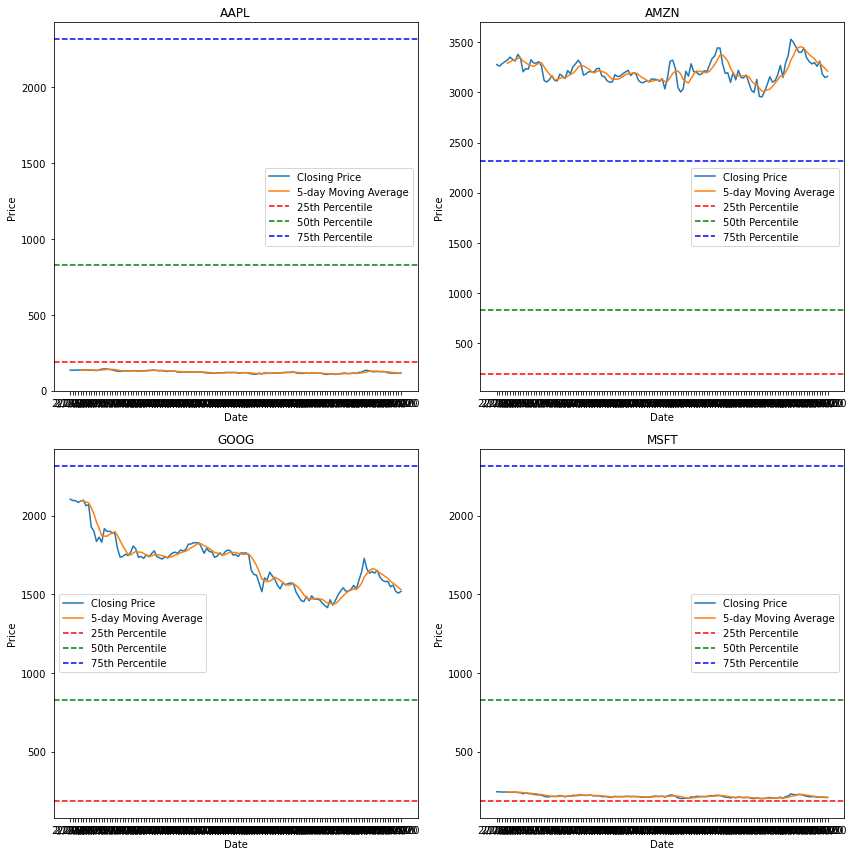

In [18]:
generate_closing_price_charts('daily_quotes.csv', 5)